In [70]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# Function to generate pairs of multivariate Gaussian samples
def generate_multivariate_gaussian_data(num_samples, mu1, cov1, mu2, cov2):
    # Define the multivariate Gaussian distributions
    source_distribution = torch.distributions.MultivariateNormal(mu1, cov1)
    target_distribution = torch.distributions.MultivariateNormal(mu2, cov2)
    
    # Sample from the multivariate Gaussian distributions
    source_samples = source_distribution.sample((num_samples,))
    target_samples = target_distribution.sample((num_samples,))
    
    # Return the source and target samples
    return source_samples, target_samples

# Example: Generate multivariate Gaussian data
num_samples = 1000  # Number of samples in each distribution
k = 3  # Number of dimensions

# Mean vectors for the source and target distributions
mu1 = torch.zeros(k)  # Mean vector for source
mu2 = torch.tensor([5.0, 5.0, 5.0])  # Mean vector for target

# Covariance matrices for the source and target distributions
cov1 = torch.eye(k)  # Identity matrix as covariance for source (independent, unit variance)
cov2 = torch.tensor([[2.0, 0.5, 0.3], 
                     [0.5, 3.0, 0.2], 
                     [0.3, 0.2, 4.0]])  # Covariance matrix for target

# Generate multivariate Gaussian samples
source_samples_mv, target_samples_mv = generate_multivariate_gaussian_data(num_samples, mu1, cov1, mu2, cov2)

# Display the first few multivariate Gaussian samples for verification
print("Source Samples (first 5):", source_samples_mv[:5])
print("Target Samples (first 5):", target_samples_mv[:5])


Source Samples (first 5): tensor([[-0.7279,  0.2159, -0.0691],
        [-1.0149,  2.5070,  0.4437],
        [-0.0509,  0.2674, -0.0944],
        [ 0.0376, -0.3212, -0.9492],
        [ 0.9012,  0.2581,  0.0779]])
Target Samples (first 5): tensor([[3.6399, 4.3158, 5.0602],
        [4.2715, 5.4355, 4.1539],
        [4.1547, 3.4722, 2.9520],
        [5.2742, 6.0010, 5.4409],
        [3.3007, 6.2214, 2.5034]])


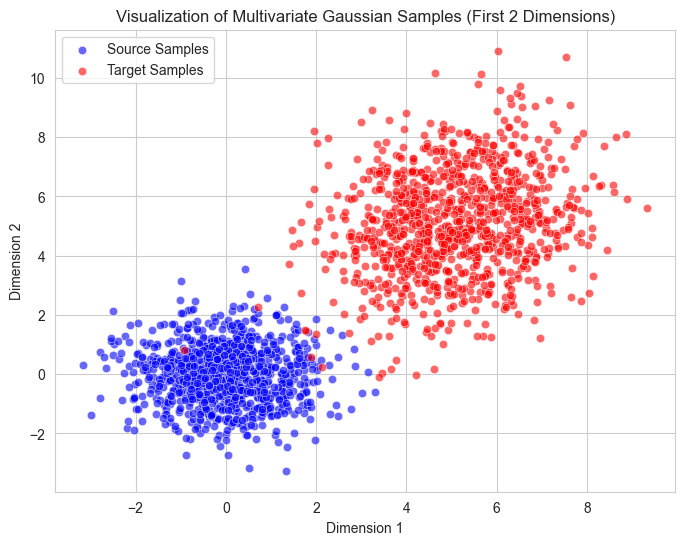

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the first two dimensions of the multivariate Gaussian data
def visualize_multivariate_gaussian_data(source_samples, target_samples):
    # Extract the first two dimensions of the source and target samples
    source_x = source_samples[:, 0]
    source_y = source_samples[:, 1]
    target_x = target_samples[:, 0]
    target_y = target_samples[:, 1]

    # Plot the source and target samples
    plt.figure(figsize=(8, 6))
    
    # Plot source samples
    sns.scatterplot(x=source_x, y=source_y, label="Source Samples", color="blue", alpha=0.6)
    
    # Plot target samples
    sns.scatterplot(x=target_x, y=target_y, label="Target Samples", color="red", alpha=0.6)
    
    plt.title("Visualization of Multivariate Gaussian Samples (First 2 Dimensions)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.show()

# Visualize the generated multivariate Gaussian samples
visualize_multivariate_gaussian_data(source_samples_mv, target_samples_mv)


In [96]:
# Function to generate multiple photos where each photo is a distribution
def generate_distribution(mu: torch.Tensor, cov: torch.Tensor, num_samples: int, k: int) -> torch.Tensor:
    """
    Generates samples from a multivariate Gaussian distribution.
    
    Parameters:
    mu (torch.Tensor): The mean vector of the Gaussian distribution.
    cov (torch.Tensor): The covariance matrix of the Gaussian distribution.
    num_samples (int): number of samples
    k (int): dimensions of the Gaussian distribution
    
    Returns:
    torch.Tensor: The generated samples where each pixel is a sample from the Gaussian distribution.
    """
    distribution = torch.distributions.MultivariateNormal(mu, cov)
    samples = distribution.sample((num_samples,))
    side_length = int(num_samples ** 0.5)
    return samples.view(side_length,side_length)

def generate_distributions(mu: torch.Tensor, cov: torch.Tensor, num_distributions: int, num_samples: int, k: int) -> list:
    """
    Generates a gallery of photos, each sampled from a random multivariate Gaussian distribution.
    
    Parameters:
    num_distributions (int): Number of photos to generate.
    num_samples (int): Number of pixels per photo.
    k (int): Number of color channels per photo.
    
    Returns:
    torch.Tensor:  of generated photos.
    """
    distributions = []
    for _ in range(num_distributions):
        distribution = generate_distribution(mu, cov, num_samples, k)
        distributions.append(distribution)
    return distributions

# Example: Generate 100 photos, each with 64 pixels (8x8 grid) and 3 channels per pixel
num_distributions = 100  # Number of photos (distributions)
num_samples = 64  # Number of pixels per photo (8x8 grid)
k = 1  # Number of dimensions per pixel (e.g., RGB channels)
mu = torch.randn(k)  # Random mean vector for each photo
cov = torch.eye(k)

source = generate_distributions(mu, cov,num_distributions, num_samples, k)

TypeError: Invalid shape (8,) for image data

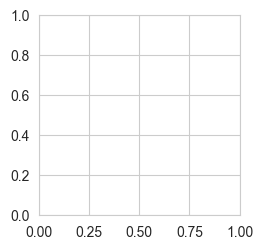

In [97]:
import matplotlib.pyplot as plt

# Function to visualize the generated "photos"
def visualize_photos(photos, num_photos_to_display=5):
    """
    Visualizes the generated photos.
    
    Parameters:
    photos (list): List of generated photos (tensors).
    num_photos_to_display (int): Number of photos to display.
    """
    plt.figure(figsize=(15, 3))
    
    for i in range(num_photos_to_display):
        # Convert tensor to numpy array for visualization
        photo = photos[i].detach().numpy()
        
        # Normalize the pixel values to be in the range [0, 1] for proper visualization
        photo_min = photo.min()
        photo_max = photo.max()
        photo = (photo - photo_min) / (photo_max - photo_min)
        
        # If the photo has 3 channels, assume it's RGB and plot as such
        if photo.shape[-1] == 3:
            plt.subplot(1, num_photos_to_display, i + 1)
            plt.imshow(photo)
            plt.title(f"Photo {i+1}")
            plt.axis('off')
        else:
            # If it's grayscale, just plot the first channel
            plt.subplot(1, num_photos_to_display, i + 1)
            plt.imshow(photo[..., 0], cmap='gray')
            plt.title(f"Photo {i+1}")
            plt.axis('off')
    
    plt.show()

# Example: Generate a few photos for visualization (using the generate_photo_gallery function)
photos = generate_distributions(mu, cov, num_distributions=10, num_samples=64, k=3)

# Visualize the first few generated photos
visualize_photos(photos, num_photos_to_display=5)


array([2, 3])

array([-1.05882353,  8.        ])

9.436895709313844e-16

2.2

0.058823529411764705

In [ ]:
17